In [32]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df_llms_performance = pd.read_csv("../performance_statistics/overall_statistics.csv")

df_llms_performance.head()

,Model,Accuracy,TN,FP,FN,TP,MCC
0,model_albert_base_0.0001_512_dataset_preproces...,0.547451,0,4244,0,5134,0.000000
1,model_albert_base_0.0001_512_dataset_preproces...,0.548198,0,4237,0,5141,0.000000
2,model_albert_base_2e-05_512_dataset_preprocess...,0.734272,2995,1249,1243,3891,0.463648
3,model_albert_base_2e-05_512_dataset_preprocess...,0.700682,2773,1464,1343,3798,0.394364
4,model_albert_base_5e-05_512_dataset_preprocess...,0.547451,0,4244,0,5134,0.000000


In [34]:
def extract_info(df):
    
    df['Modelname'] = df['Model'].apply(lambda x: "_".join(x.split("_")[1:x.split("_").index('dataset') - 2]))
    df['Max_length'] = df['Model'].apply(lambda x: int(x.split("_")[x.split("_").index('dataset') - 1]))
    df['Learning_rate'] = df['Model'].apply(lambda x: float(x.split("_")[x.split("_").index('dataset') - 2]))
    df['Dataset'] = df['Model'].apply(lambda x: "_".join(x.split("_")[x.split("_").index('dataset') + 2:]))

    df.drop('Model', axis=1, inplace=True)
    df.rename(columns={'Accuracy': 'Test Accuracy'}, inplace=True)

    df = df[['Modelname', 'Max_length', 'Learning_rate', 'Dataset', 'Test Accuracy', 'TN', 'FP', 'FN', 'TP', 'MCC']]
    # Return the modified DataFrame
    return df

# Apply the function to your DataFrame
df_llms_performance = extract_info(df_llms_performance.copy())  # Operate on a copy to avoid modifying original data
df_llms_performance.head()

,Modelname,Max_length,Learning_rate,Dataset,Test Accuracy,TN,FP,FN,TP,MCC
0,albert_base,512,0.00010,no_transformation,0.547451,0,4244,0,5134,0.000000
1,albert_base,512,0.00010,stopwords,0.548198,0,4237,0,5141,0.000000
2,albert_base,512,0.00002,no_transformation,0.734272,2995,1249,1243,3891,0.463648
3,albert_base,512,0.00002,stopwords,0.700682,2773,1464,1343,3798,0.394364
4,albert_base,512,0.00005,no_transformation,0.547451,0,4244,0,5134,0.000000


## Grouping the Dataframe

In [35]:
df_llms_performance.groupby(['Dataset', 'Max_length', 'Learning_rate', 'Modelname'])[['Test Accuracy', 'MCC']].mean()

Test Accuracy  \
Dataset           Max_length Learning_rate Modelname                    
no_transformation 256        0.00002       albert_base       0.722329   
                                           bert_base         0.796012   
                                           distilbert        0.781083   
                                           roberta           0.796225   
                                           transformer       0.700363   
                             0.00005       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.741309   
                                           roberta           0.547451   
                                           transformer       0.547451   
                             0.00010       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.547451   
                                           roberta           0.547451   
                                           transformer       0.547451   
                  512        0.00002       albert_base       0.734272   
                                           bert_base         0.799851   
                                           distilbert        0.781830   
                                           roberta           0.806569   
                                           transformer       0.818511   
                             0.00005       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.735125   
                                           roberta           0.547451   
                                           transformer       0.547451   
                             0.00010       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.547451   
                                           roberta           0.547451   
                                           transformer       0.547451   
stopwords         256        0.00002       albert_base       0.716571   
                                           bert_base         0.745468   
                                           distilbert        0.746534   
                                           roberta           0.746961   
                                           transformer       0.548198   
                             0.00005       albert_base       0.716038   
                                           bert_base         0.548198   
                                           distilbert        0.723928   
                                           roberta           0.548198   
                                           transformer       0.548198   
                             0.00010       albert_base       0.629985   
                                           bert_base         0.548198   
                                           distilbert        0.548198   
                                           roberta           0.548198   
                                           transformer       0.548198   
                  512        0.00002       albert_base       0.700682   
                                           bert_base         0.751120   
                                           distilbert        0.749200   
                                           roberta           0.744615   
                                           transformer       0.548198   
                             0.00005       albert_base       0.548198   
                                           bert_base         0.548198   
                                           distilbert        0.724142   
                                         

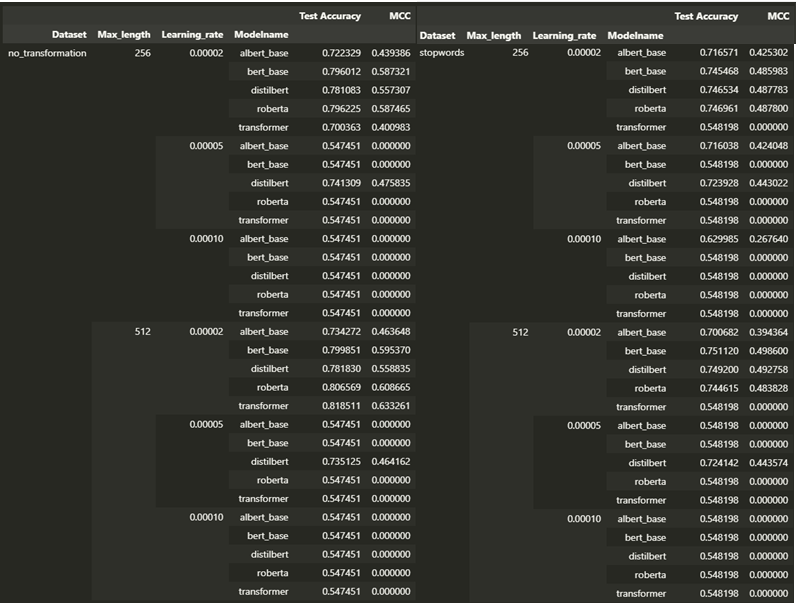

## Extracting best Models

In [36]:
df_llms_performance = df_llms_performance.sort_values(by = 'Test Accuracy', ascending = False)
df_llms_performance = df_llms_performance[0:5]
df_llms_performance

,Modelname,Max_length,Learning_rate,Dataset,Test Accuracy,TN,FP,FN,TP,MCC
49,transformer,512,0.00002,no_transformation,0.818511,3357,887,815,4319,0.633261
37,roberta,512,0.00002,no_transformation,0.806569,3251,993,821,4313,0.608665
13,bert_base,512,0.00002,no_transformation,0.799851,3255,989,888,4246,0.595370
46,roberta,256,0.00002,no_transformation,0.796225,3151,1093,818,4316,0.587465
19,bert_base,256,0.00002,no_transformation,0.796012,3208,1036,877,4257,0.587321


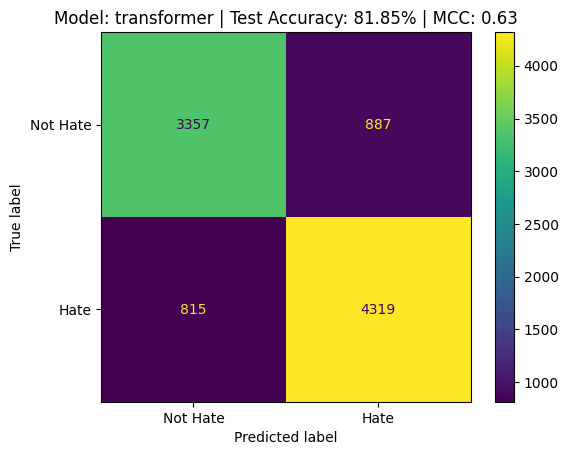

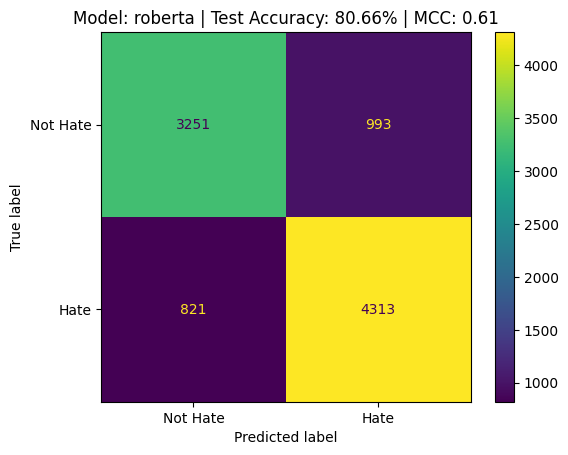

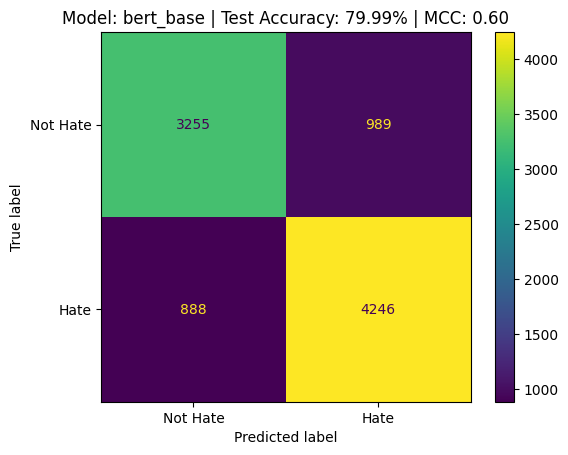

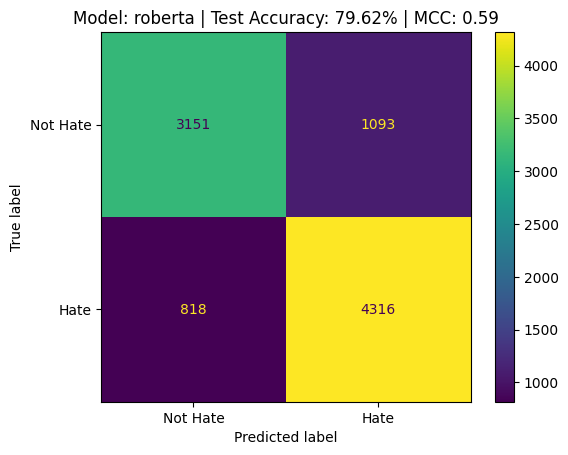

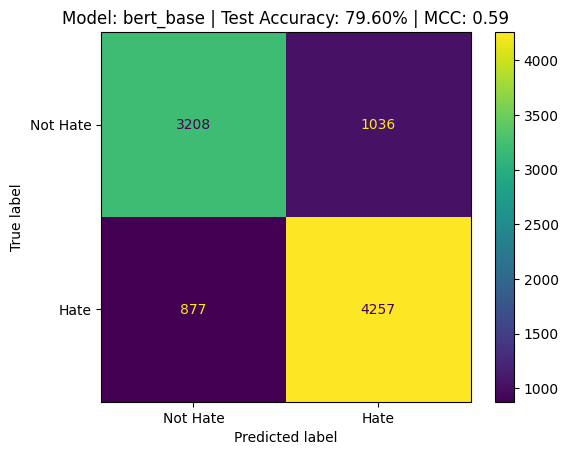

In [37]:
for row in df_llms_performance.iterrows():
    
    TN = row[1]['TN']
    FP = row[1]['FP']
    FN = row[1]['FN']
    TP = row[1]['TP']
    
    test_accuracy = row[1]['Test Accuracy'] * 100

    # Print the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = np.array([[TN, FP], [FN, TP]]), display_labels= ['Not Hate', 'Hate'])

    disp.plot()
    disp.ax_.set_title(f"Model: {row[1]['Modelname']} | Test Accuracy: {test_accuracy:.2f}% | MCC: {row[1]['MCC']:.2f}")
    plt.show()
